In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("railway.csv")

In [3]:
data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [5]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase']).dt.strftime('%m/%d/%Y')

In [6]:
data['Date of Journey'] = pd.to_datetime(data['Date of Journey']).dt.strftime('%m/%d/%Y')

In [7]:
data.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [8]:
data.shape

(31653, 18)

In [9]:
data.nunique()

Transaction ID         31653
Date of Purchase         128
Time of Purchase       24351
Purchase Type              2
Payment Method             3
Railcard                   3
Ticket Class               2
Ticket Type                3
Price                    125
Departure Station         12
Arrival Destination       32
Date of Journey          121
Departure Time            96
Arrival Time             203
Actual Arrival Time      623
Journey Status             3
Reason for Delay           8
Refund Request             2
dtype: int64

In [10]:
data.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [11]:
data.fillna({'Railcard': 'Not a holder', 'Reason for Delay': 'Arrived on Time'}, inplace=True)

In [12]:
avg_price= data['Price'].mean()
print("The Average Price:",avg_price.round(2))

The Average Price: 23.44


In [13]:
total_revenue=data['Price'].sum()
print("The total revenue:",total_revenue)

The total revenue: 741921


In [14]:
purchase_type = data['Purchase Type'].value_counts()
print("Counts of each unique value in 'Purchase Type':")
print(purchase_type)

Counts of each unique value in 'Purchase Type':
Purchase Type
Online     18521
Station    13132
Name: count, dtype: int64


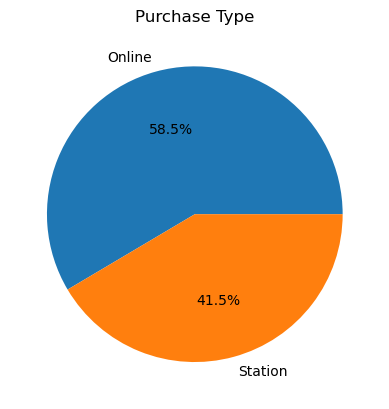

In [15]:
plt.pie(purchase_type,labels=purchase_type.index, autopct='%1.1f%%')  
plt.title('Purchase Type')
plt.show()


In [16]:
Payment_Method = data['Payment Method'].value_counts()

print("Counts of each unique value in 'Payment Method':")
print(Payment_Method)

Counts of each unique value in 'Payment Method':
Payment Method
Credit Card    19136
Contactless    10834
Debit Card      1683
Name: count, dtype: int64


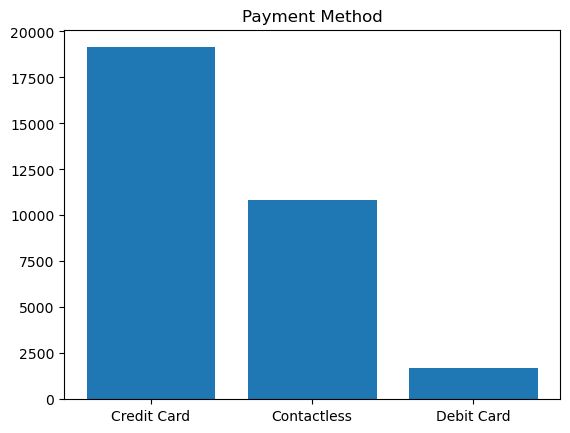

In [17]:
plt.bar(Payment_Method.index,Payment_Method.values)  
plt.title('Payment Method')
plt.show()

In [18]:
Railcard= data['Railcard'].value_counts()

print("Counts of each unique value in 'Railcard':")
print(Railcard)

Counts of each unique value in 'Railcard':
Railcard
Not a holder    20918
Adult            4846
Disabled         3089
Senior           2800
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

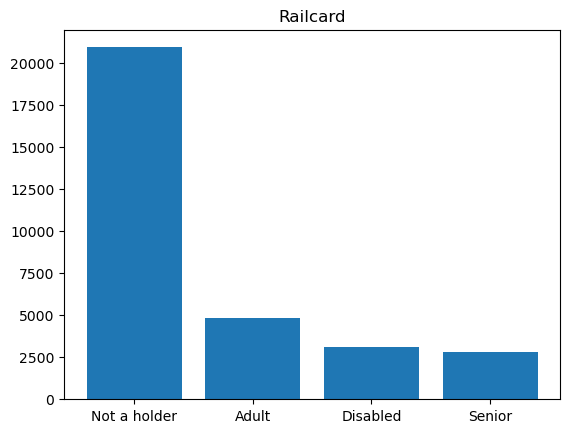

In [19]:
plt.bar(Railcard.index,Railcard.values)  
plt.title('Railcard')
plt.show   

In [20]:
Ticket_class= data['Ticket Class'].value_counts()

print("Counts of each unique value in 'Ticket Class':")
print(Ticket_class)

Counts of each unique value in 'Ticket Class':
Ticket Class
Standard       28595
First Class     3058
Name: count, dtype: int64


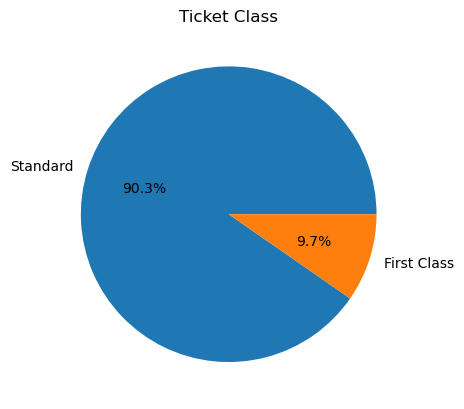

In [21]:
plt.pie(Ticket_class,labels=Ticket_class.index,autopct='%1.1f%%')  
plt.title('Ticket Class')
plt.show()

In [22]:
Ticket_type= data['Ticket Type'].value_counts()

print("Counts of each unique value in 'Ticket Type':")
print(Ticket_type)

Counts of each unique value in 'Ticket Type':
Ticket Type
Advance     17561
Off-Peak     8752
Anytime      5340
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

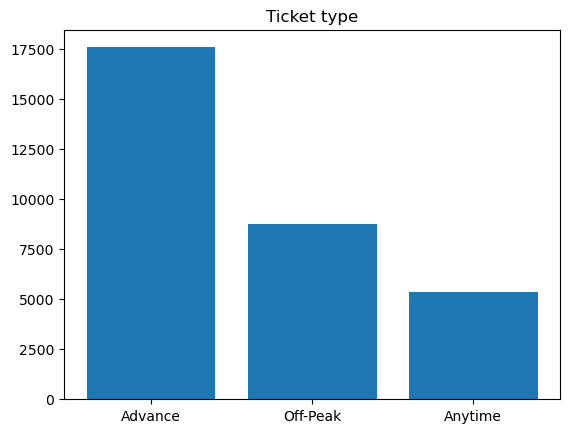

In [23]:
plt.bar(Ticket_type.index,Ticket_type.values)  
plt.title('Ticket type')
plt.show   

In [24]:
Journey_status = data['Journey Status'].value_counts()

print("Counts of each unique value in 'Journey Status':")
print(Journey_status)

Counts of each unique value in 'Journey Status':
Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

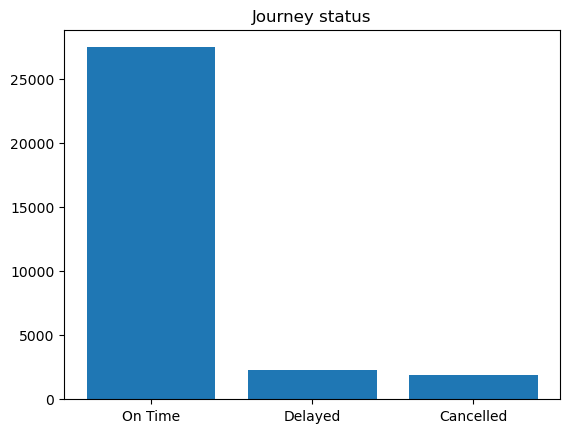

In [25]:
plt.bar(Journey_status.index,Journey_status.values)  
plt.title('Journey status')
plt.show   

In [26]:
Reason_delay = data['Reason for Delay'].value_counts()

print("Counts of each unique value in 'Reason for Delay':")
print(Reason_delay)

Counts of each unique value in 'Reason for Delay':
Reason for Delay
Arrived on Time       27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

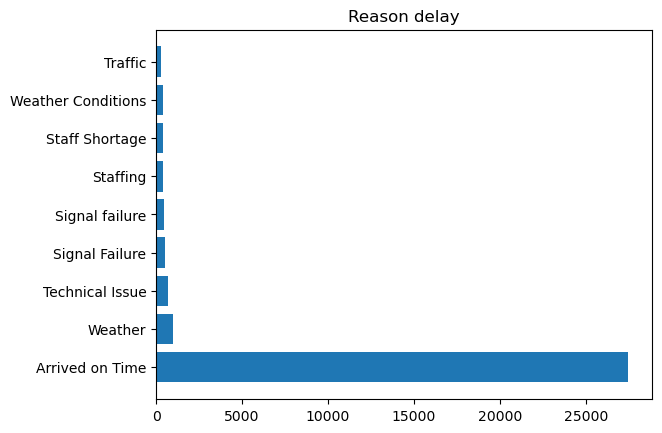

In [27]:
plt.barh(Reason_delay.index,Reason_delay.values)  
plt.title('Reason delay')
plt.show   

In [28]:
Refund_request = data['Refund Request'].value_counts()

print("Counts of each unique value in 'Refund Request':")

print(Refund_request)

Counts of each unique value in 'Refund Request':
Refund Request
No     30535
Yes     1118
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

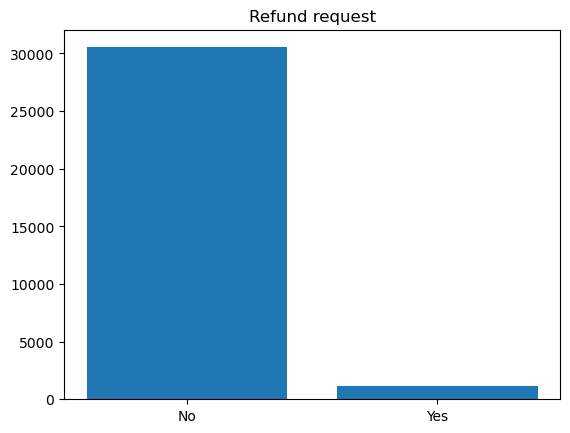

In [29]:
plt.bar(Refund_request.index,Refund_request.values)  
plt.title('Refund request')
plt.show   

In [30]:
Departure_station = data['Departure Station'].value_counts()

print("Counts of each unique value in 'Departure Station':")
print(Departure_station)

Counts of each unique value in 'Departure Station':
Departure Station
Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
London St Pancras        3891
Birmingham New Street    2136
York                      927
Reading                   594
Oxford                    144
Edinburgh Waverley         51
Bristol Temple Meads       16
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

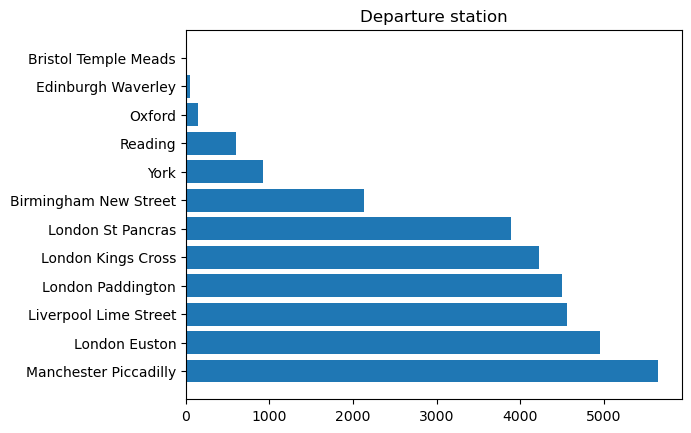

In [31]:
plt.barh(Departure_station.index,Departure_station.values)  
plt.title('Departure station')
plt.show   

In [32]:
Arrival_destination = data['Arrival Destination'].value_counts()

print("Counts of each unique value in 'Arrival Destination':")

print(Arrival_destination)

Counts of each unique value in 'Arrival Destination':
Arrival Destination
Birmingham New Street    7742
Liverpool Lime Street    5022
York                     4019
Manchester Piccadilly    3968
Reading                  3920
London Euston            1567
London St Pancras         749
Oxford                    623
London Paddington         351
Leicester                 337
Sheffield                 272
Durham                    258
Leeds                     255
Peterborough              242
Swindon                   228
Tamworth                  227
Nuneaton                  219
Doncaster                 211
Crewe                     193
Stafford                  190
Edinburgh Waverley        178
Nottingham                158
Edinburgh                 154
Bristol Temple Meads      144
Wolverhampton             115
London Kings Cross         84
London Waterloo            68
Coventry                   65
Didcot                     48
Cardiff Central            16
Wakefield                 

<function matplotlib.pyplot.show(close=None, block=None)>

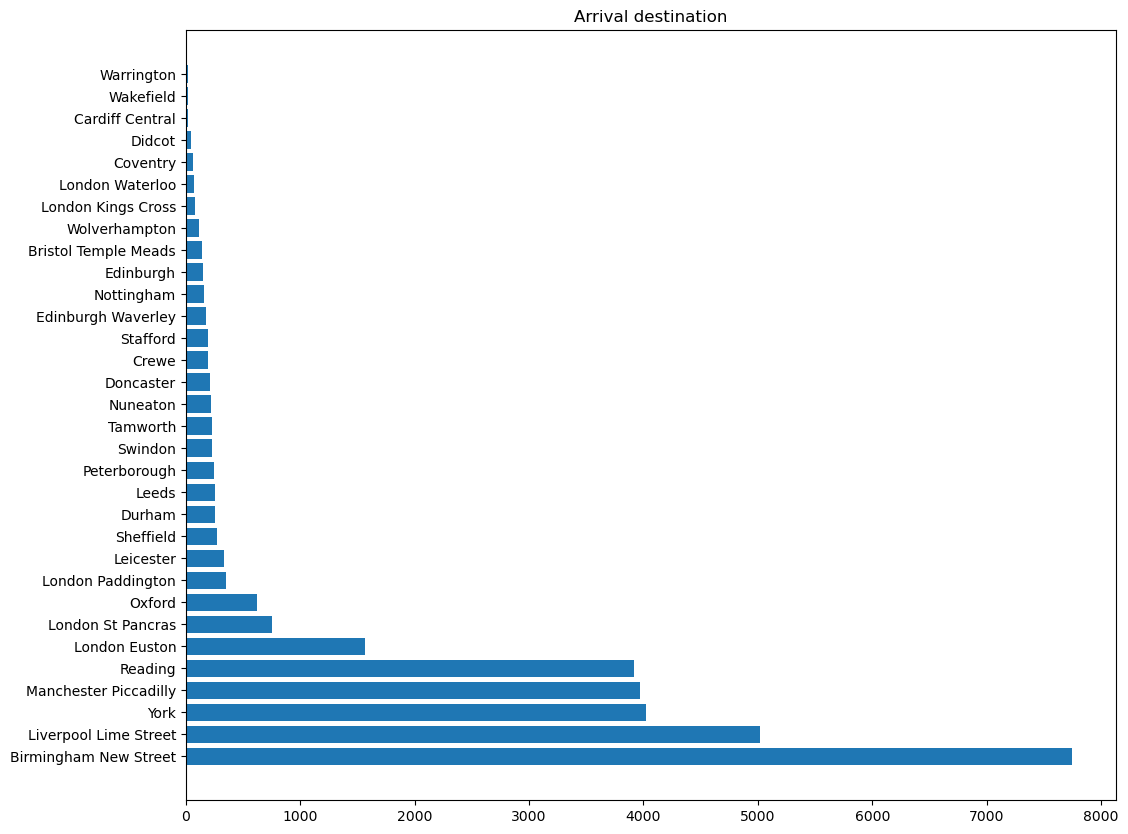

In [33]:
plt.figure(figsize=(12, 10))  # Set figure size for better fit
plt.barh(Arrival_destination.index,Arrival_destination.values)  
plt.title('Arrival destination')
plt.show   

In [34]:
routes = data['Departure Station']  + ' ---->' + data['Arrival Destination']

route_frequency = routes.value_counts()

top_10_routes = route_frequency.head(10)

In [35]:
print("Top 10 Famous Routes:")
print(top_10_routes)

Top 10 Famous Routes:
Manchester Piccadilly ---->Liverpool Lime Street    4628
London Euston ---->Birmingham New Street            4209
London Kings Cross ---->York                        3922
London Paddington ---->Reading                      3873
London St Pancras ---->Birmingham New Street        3471
Liverpool Lime Street ---->Manchester Piccadilly    3002
Liverpool Lime Street ---->London Euston            1097
London Euston ---->Manchester Piccadilly             712
Birmingham New Street ---->London St Pancras         702
London Paddington ---->Oxford                        485
Name: count, dtype: int64


Revenue Distribution from different Sources

In [36]:
revenue1 = data.groupby(['Payment Method'])['Price'].sum().reset_index()
revenue1.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue1

,Payment Method,Revenue
0,Contactless,219444
1,Credit Card,469511
2,Debit Card,52966


In [37]:
revenue2 = data.groupby(['Purchase Type'])['Price'].sum().reset_index()
revenue2.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue2

,Purchase Type,Revenue
0,Online,382754
1,Station,359167


In [38]:
revenue3 = data.groupby(['Railcard'])['Price'].sum().reset_index()
revenue3.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue3

,Railcard,Revenue
0,Adult,86330
1,Disabled,52278
2,Not a holder,573697
3,Senior,29616


In [39]:
revenue4 = data.groupby(['Ticket Class'])['Price'].sum().reset_index()
revenue4.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue4

,Ticket Class,Revenue
0,First Class,149399
1,Standard,592522


In [40]:
revenue5 = data.groupby(['Ticket Type'])['Price'].sum().reset_index()
revenue5.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue5

,Ticket Type,Revenue
0,Advance,309274
1,Anytime,209309
2,Off-Peak,223338


In [41]:
revenue6 = data.groupby(['Departure Station'])['Price'].sum().reset_index()
revenue6.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue6

,Departure Station,Revenue
0,Birmingham New Street,38116
1,Bristol Temple Meads,98
2,Edinburgh Waverley,2093
3,Liverpool Lime Street,135274
4,London Euston,112045
5,London Kings Cross,199650
6,London Paddington,83842
7,London St Pancras,62957
8,Manchester Piccadilly,75314
9,Oxford,2859


In [42]:
revenue6 = data.groupby(['Arrival Destination'])['Price'].sum().reset_index()
revenue6.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue6

,Arrival Destination,Revenue
0,Birmingham New Street,106050
1,Bristol Temple Meads,2859
2,Cardiff Central,98
3,Coventry,269
4,Crewe,1563
5,Didcot,212
6,Doncaster,1311
7,Durham,1983
8,Edinburgh,4514
9,Edinburgh Waverley,6488


In [43]:
revenue6 = data.groupby(['Refund Request'])['Price'].sum().reset_index()
revenue6.rename(columns={'Price': 'Revenue'}, inplace=True)
revenue6

,Refund Request,Revenue
0,No,703219
1,Yes,38702


In [44]:
revenue7 = data.groupby(['Reason for Delay', 'Refund Request'])['Price'].sum().reset_index()
revenue7.rename(columns={'Price': 'Revenue'}, inplace=True)

revenue7

,Reason for Delay,Refund Request,Revenue
0,Arrived on Time,No,569651
1,Signal Failure,No,8265
2,Signal Failure,Yes,1856
3,Signal failure,No,10164
4,Signal failure,Yes,2542
5,Staff Shortage,No,5391
6,Staff Shortage,Yes,2420
7,Staffing,No,8225
8,Staffing,Yes,9247
9,Technical Issue,No,9396


In [45]:
delay = pd.crosstab(data['Reason for Delay'], data['Refund Request'], margins=True)
delay

Refund Request,No,Yes,All
Reason for Delay,,,
Arrived on Time,27481,0,27481
Signal Failure,413,110,523
Signal failure,342,105,447
Staff Shortage,320,79,399
Staffing,228,182,410
Technical Issue,319,388,707
Traffic,193,121,314
Weather,926,69,995
Weather Conditions,313,64,377
